<a href="https://colab.research.google.com/github/jgmsgabriel/NotebooksGeo/blob/main/Daninhaas_Contagem_Plantas_VisaoComp_0105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acesso ao drive: https://drive.google.com/drive/folders/1a457nwm6XzmpIPeKdPkRrvGLZQdjut7E?usp=sharing

Técnica de visão computacional para filtragem e seleção de plantas daninhas

In [ ]:
!pip install geopandas
!pip install rasterio

Agora, vamos conectar o Drive para acessar os arquivos que serão utilizados:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instalamos as bibliotecas que vamos usar

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import math
import os
import rasterio
from rasterio.mask import mask
import json
from rasterio.plot import show
import matplotlib.pyplot as plt
import cv2

Então setamos o caminho da imagem que vamos usar:

In [ ]:
path_img = '/content/drive/MyDrive/Formacoes/Geoprocessamento/Cana_DR_Mucuna_Guilherme/Resultados/resultado_mucuna.tif'
path_ori = '/content/drive/MyDrive/Formacoes/Geoprocessamento/Cana_DR_Mucuna_Guilherme/Ortomosaico/Orto_1.tif'

Com o rasterio abrimos a imagem e plotamos com o matplotlib:

In [ ]:
src = rasterio.open(path_img)
src_ori = rasterio.open(path_ori)

In [ ]:
img = src_ori.read()

In [ ]:
img_daninha = src.read()

In [ ]:
img.shape

(4, 7266, 5829)

In [ ]:
img_daninha.shape

(1, 7266, 5829)

In [ ]:
img = img.transpose([1,2,0])

In [ ]:
img_daninha = img_daninha.transpose([1,2,0])

In [ ]:
img.shape

(7266, 5829, 4)

In [ ]:
img_daninha.shape

(7266, 5829, 1)

In [ ]:
img

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [ ]:
img_daninha

array([[[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]],

       [[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]]])

In [ ]:
img = img.astype('uint8')

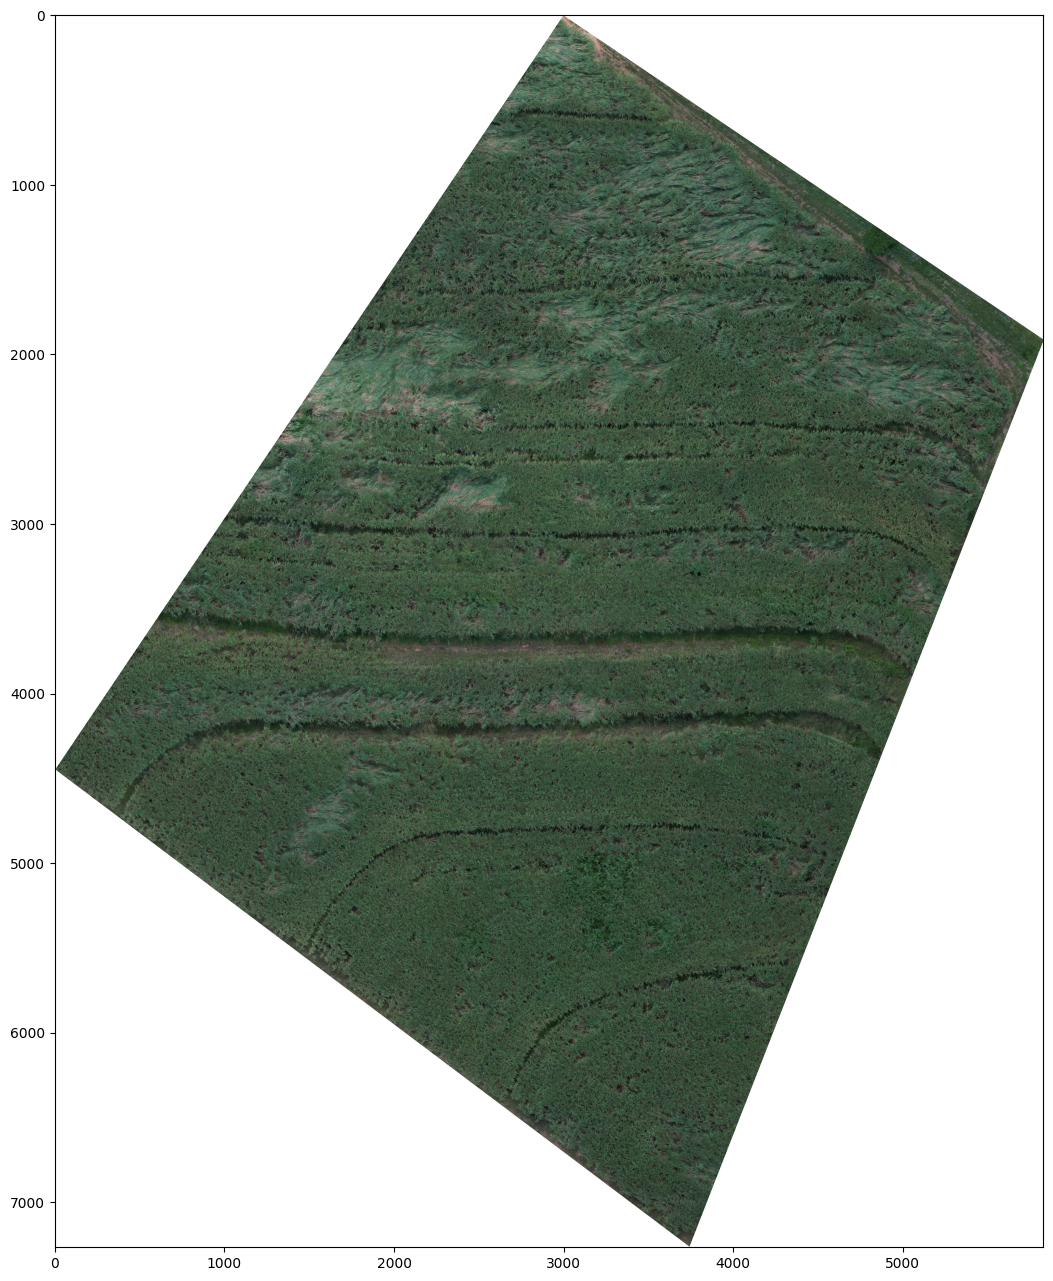

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(img)

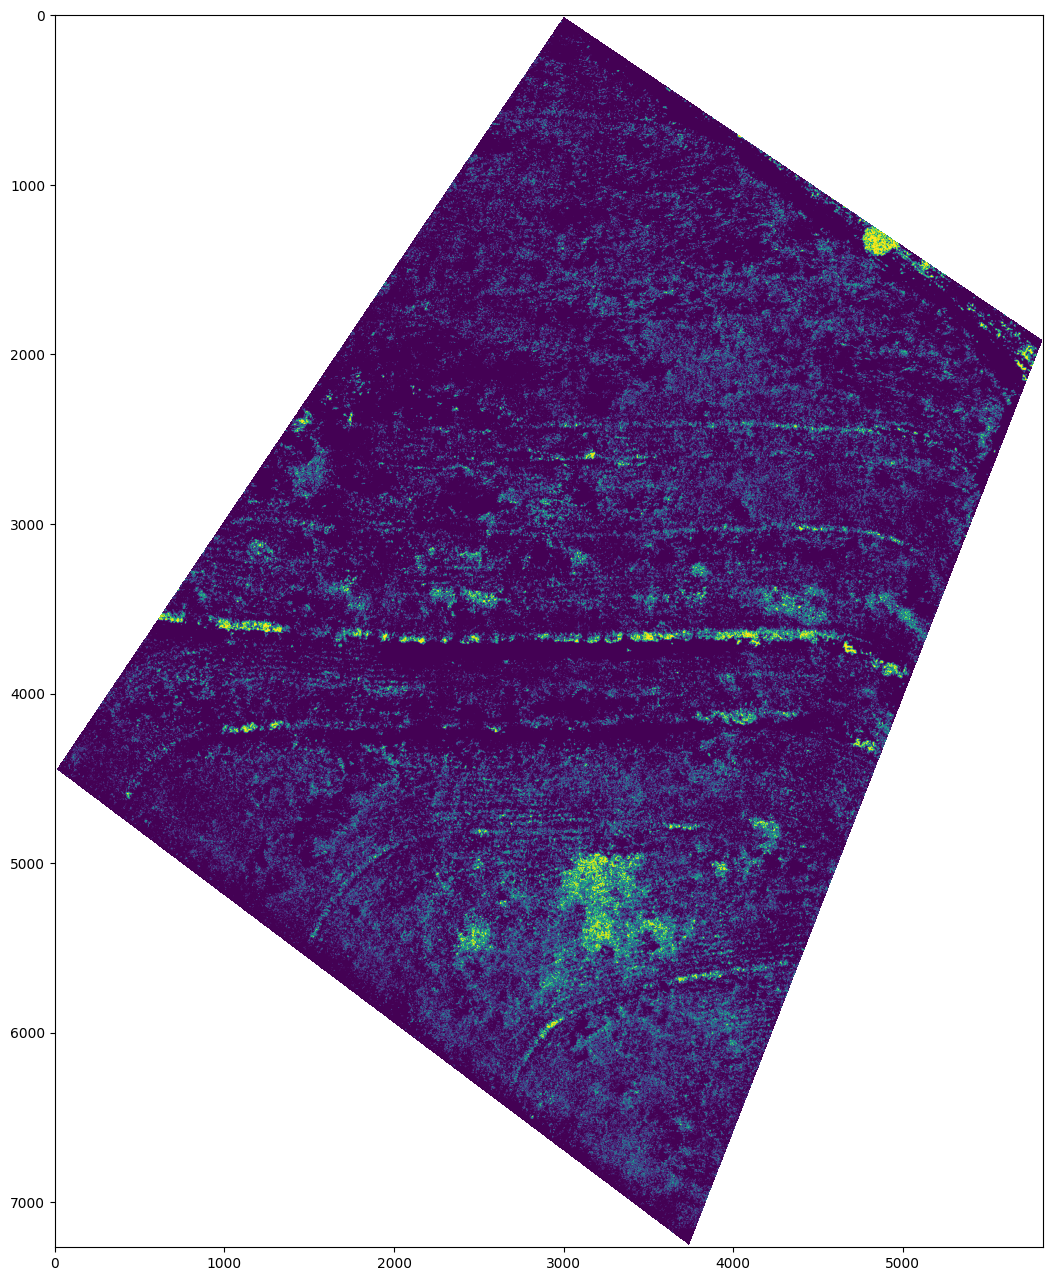

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(img_daninha)

Na nossa imagem RGB vamos separar as bandas espectrais nos canais R,G,B.

In [ ]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

E plotar somente o canal G, com um mapa de cor 'RdYlGn':

(-0.5, 5828.5, 7265.5, -0.5)

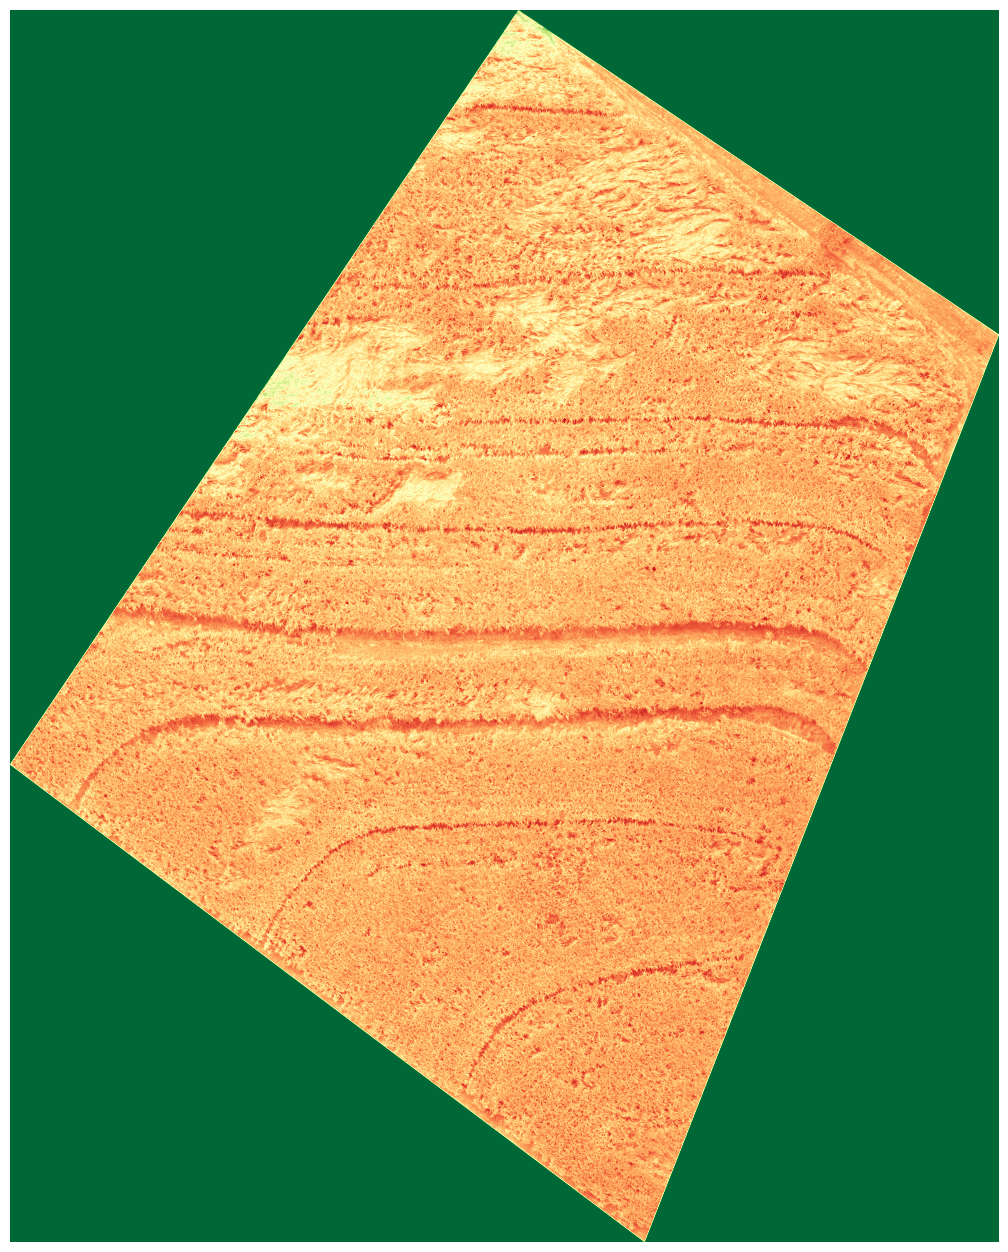

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(G,cmap='RdYlGn')
plt.axis('off')

Vamos usar esse canal para realizar a binarização da imagem. Antes, vamos converter os valores de bordas que estão em 255 para 0.

In [ ]:
G = np.where(G == 255,0,G)

In [ ]:
G

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Para binarizar a imagem, vamos usar o algoritmo de otsu.

In [ ]:
binary = img_daninha

In [ ]:
print(binary)

[[[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 ...

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]]


In [ ]:
type(binary)

numpy.ndarray

(-0.5, 5828.5, 7265.5, -0.5)

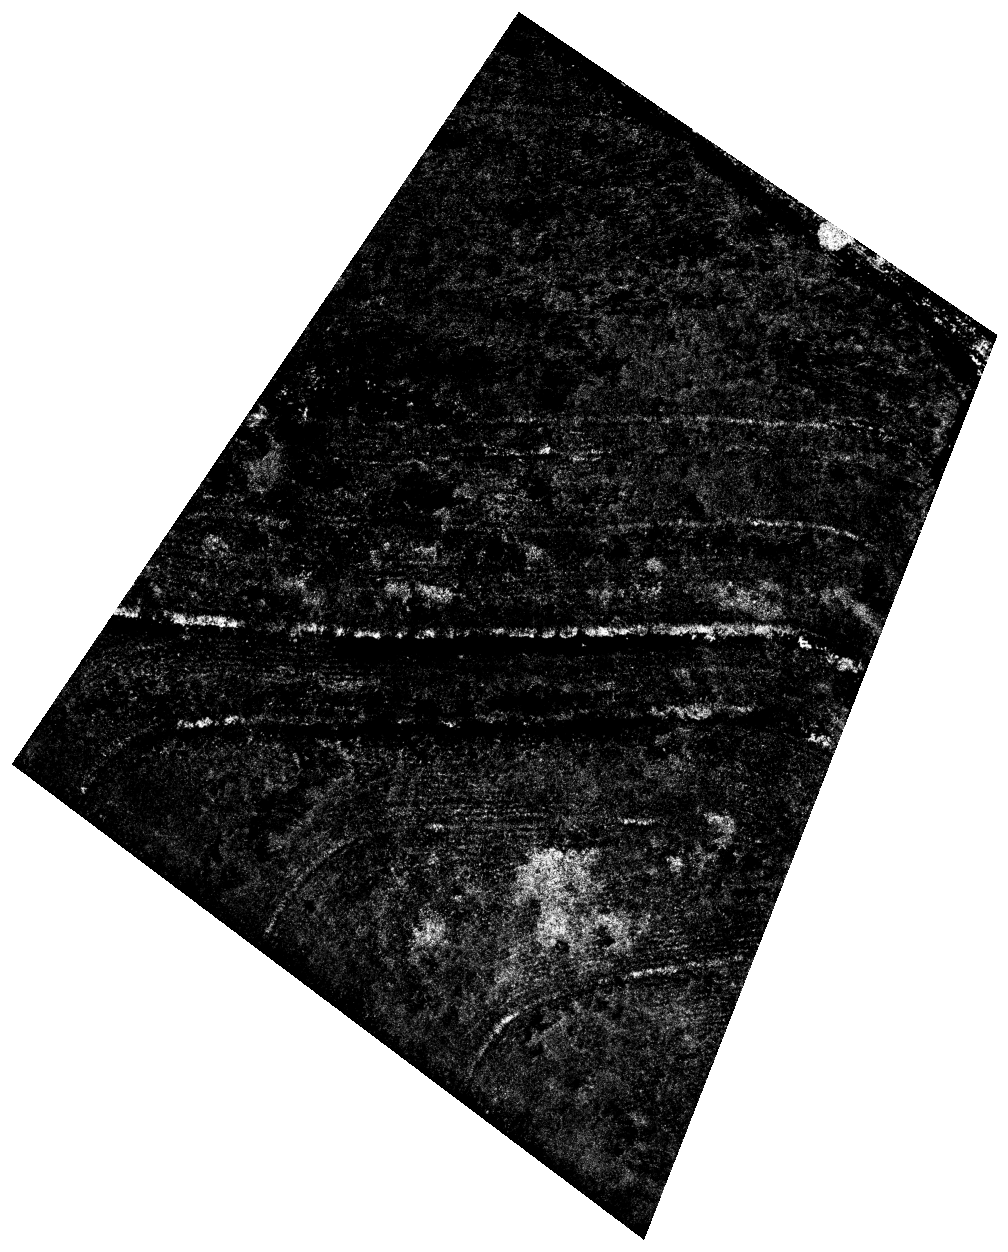

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(binary,cmap=plt.cm.gray)
plt.axis('off')

Com a imagem binarizada, vamos aplicar operações de erosão e dilatação para remover ruídos e criar áreas mais concisas.

In [ ]:
binary = binary.astype('uint8')

<ipython-input-27-ef8744899343>:1: RuntimeWarning: invalid value encountered in cast
  binary = binary.astype('uint8')


In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

horizontal = cv2.dilate(binary, kernel, iterations = 3)
horizontal = cv2.erode(horizontal, kernel,  iterations = 15)
horizontal = cv2.dilate(horizontal, kernel, iterations = 6)
horizontal = cv2.erode(horizontal, kernel,  iterations = 14)


(-0.5, 5828.5, 7265.5, -0.5)

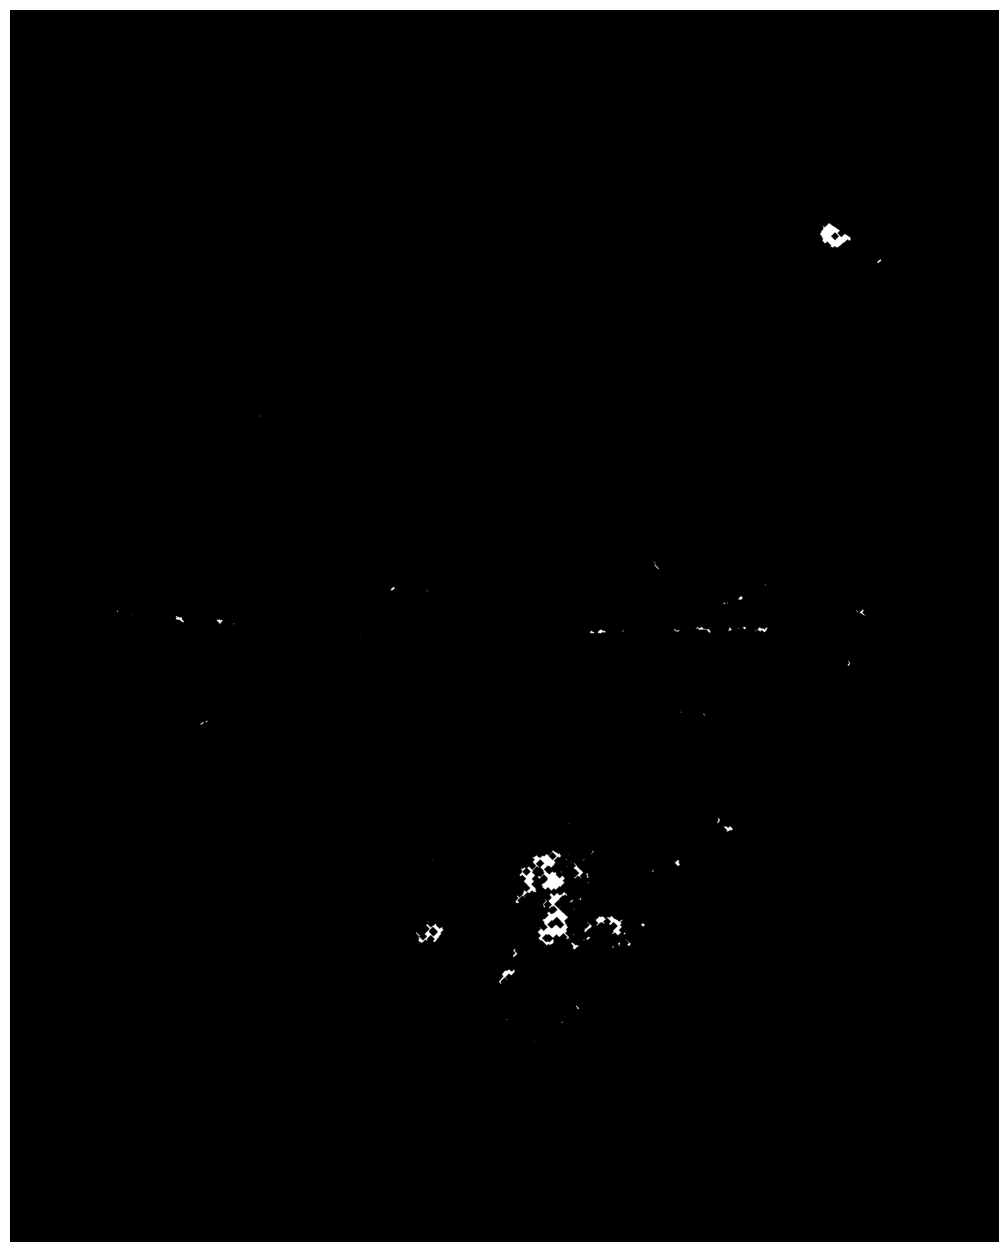

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(horizontal,cmap=plt.cm.gray)
plt.axis('off')

A próxima etapa é obter cada componenta da imagem e obter a contagem:

In [ ]:
num_labels, labels_im = cv2.connectedComponents(horizontal)

In [ ]:
num_labels

88

(-0.5, 5828.5, 7265.5, -0.5)

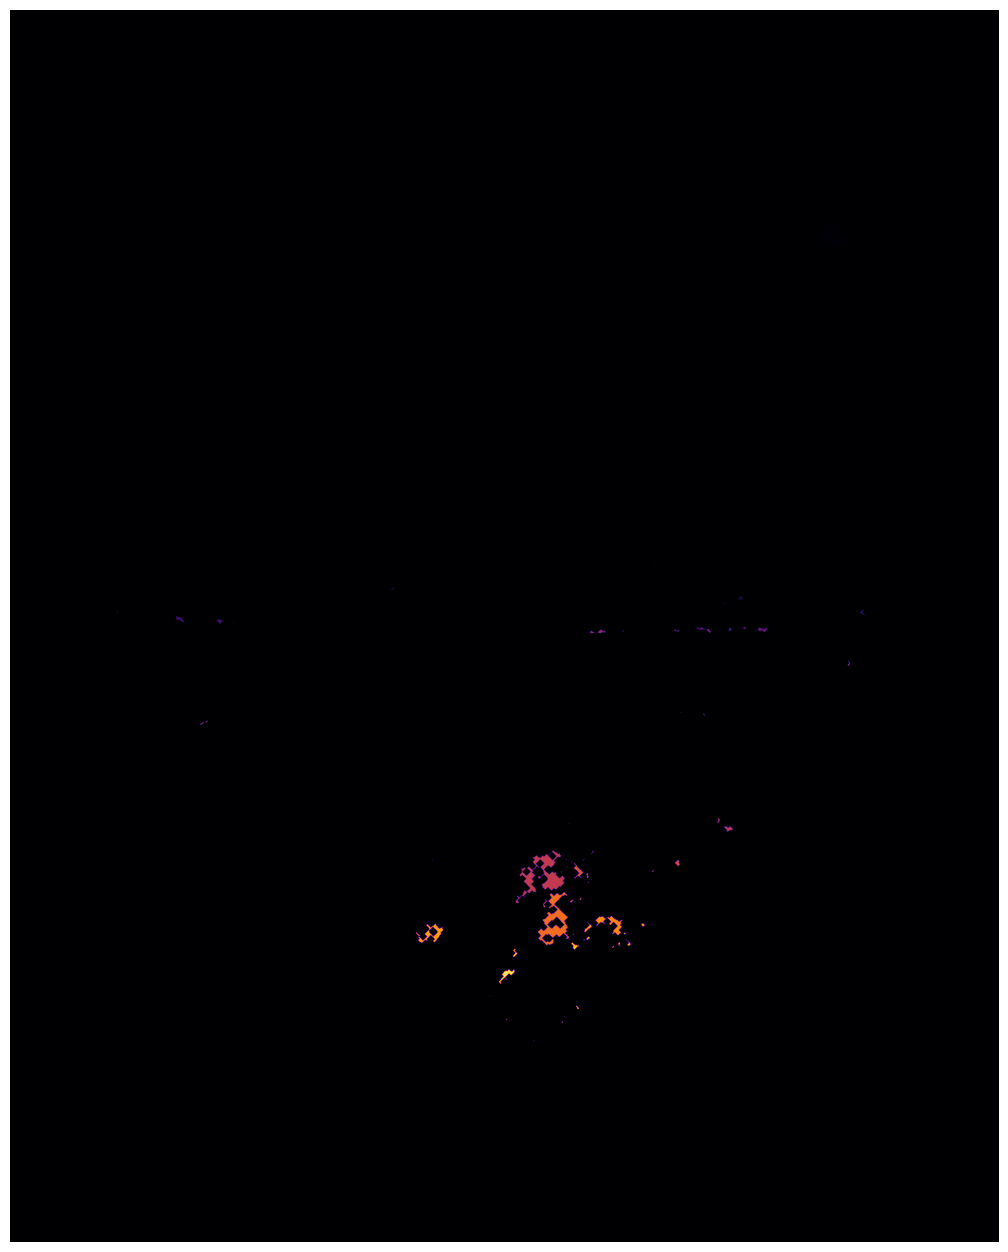

In [ ]:
plt.figure(figsize=[16,16])
plt.imshow(labels_im,cmap='inferno')
plt.axis('off')

Assim, podemos obter a localização de cada objeto na imagem. Vamos plotar o boundbox de cada objeto:

In [ ]:
import matplotlib.patches as mpatches

from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [ ]:
label_image = label(horizontal)

In [ ]:
img = img[:,:,0:3]

In [ ]:
image_label_overlay = label2rgb(label_image, image=img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Então, com o rasterio, podemos converter o ponto central em valores de latitude e longitude:

In [ ]:
break

In [ ]:
ls_x = []
ls_y = []
for region in regionprops(label_image):
    if region.area >= 1:
      y0, x0 = region.centroid
      xs, ys = rasterio.transform.xy(src.transform, y0, x0)
      ls_x.append(xs)
      ls_y.append(ys)

Criamos um DataFrame para armazenar esses valores, e depois um GeoDataFrame.

In [ ]:
df_xy = pd.DataFrame([])
df_xy['x'] = ls_x
df_xy['y'] = ls_y

In [ ]:
gdf = gpd.GeoDataFrame(df_xy, geometry=gpd.points_from_xy(df_xy['x'], df_xy['y']))

In [ ]:
gdf = gdf.set_crs(src.crs.to_dict()['init'])

Por fim, plotamos os pontos juntos com a imagem georreferênciada:

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
show((src), ax=ax)
gdf.plot(ax=ax,  marker='o', color='red', markersize=15)

Podemos salvar o arquivo em um shapefile e fazer o donwload:

In [ ]:
if not os.path.isdir('/content/shapefile'):
    os.mkdir('/content/shapefile')

In [ ]:
gdf.to_file("/content/shapefile/Plants.shp")

In [ ]:
!zip -r /content/shapefile.zip /content/shapefile
from google.colab import files
files.download("/content/shapefile.zip")